[0.         0.00475789 0.01057309 0.0172637  0.02349576 0.03046823
 0.03836379 0.04527902 0.05221281 0.05989552 0.06770718 0.0763203
 0.08525286 0.09374184 0.10062004 0.10788253 0.11602846 0.12406754
 0.13310116 0.14268301 0.15046039 0.15936215 0.16960066 0.17877418
 0.1894508  0.2025     0.2083152  0.21542267 0.22360008 0.23121704
 0.23973895 0.24938907 0.25784102 0.26631565 0.27570564 0.28525321
 0.29578036 0.30669794 0.31707336 0.32548005 0.33435642 0.34431256
 0.3541381  0.3651792  0.37689035 0.38639603 0.39727596 0.40978969
 0.42100178 0.43405098 0.45       0.4558152  0.46292267 0.47110008
 0.47871704 0.48723895 0.49688907 0.50534102 0.51381565 0.52320564
 0.53275321 0.54328036 0.55419794 0.56457336 0.57298005 0.58185642
 0.59181256 0.6016381  0.6126792  0.62439035 0.63389603 0.64477596
 0.65728969 0.66850178 0.68155098 0.6975     0.70460747 0.71329437
 0.72328899 0.73259861 0.74301427 0.75480887 0.76513903 0.77549691
 0.78697356 0.79864282 0.81150933 0.82485304 0.83753411 0.84780

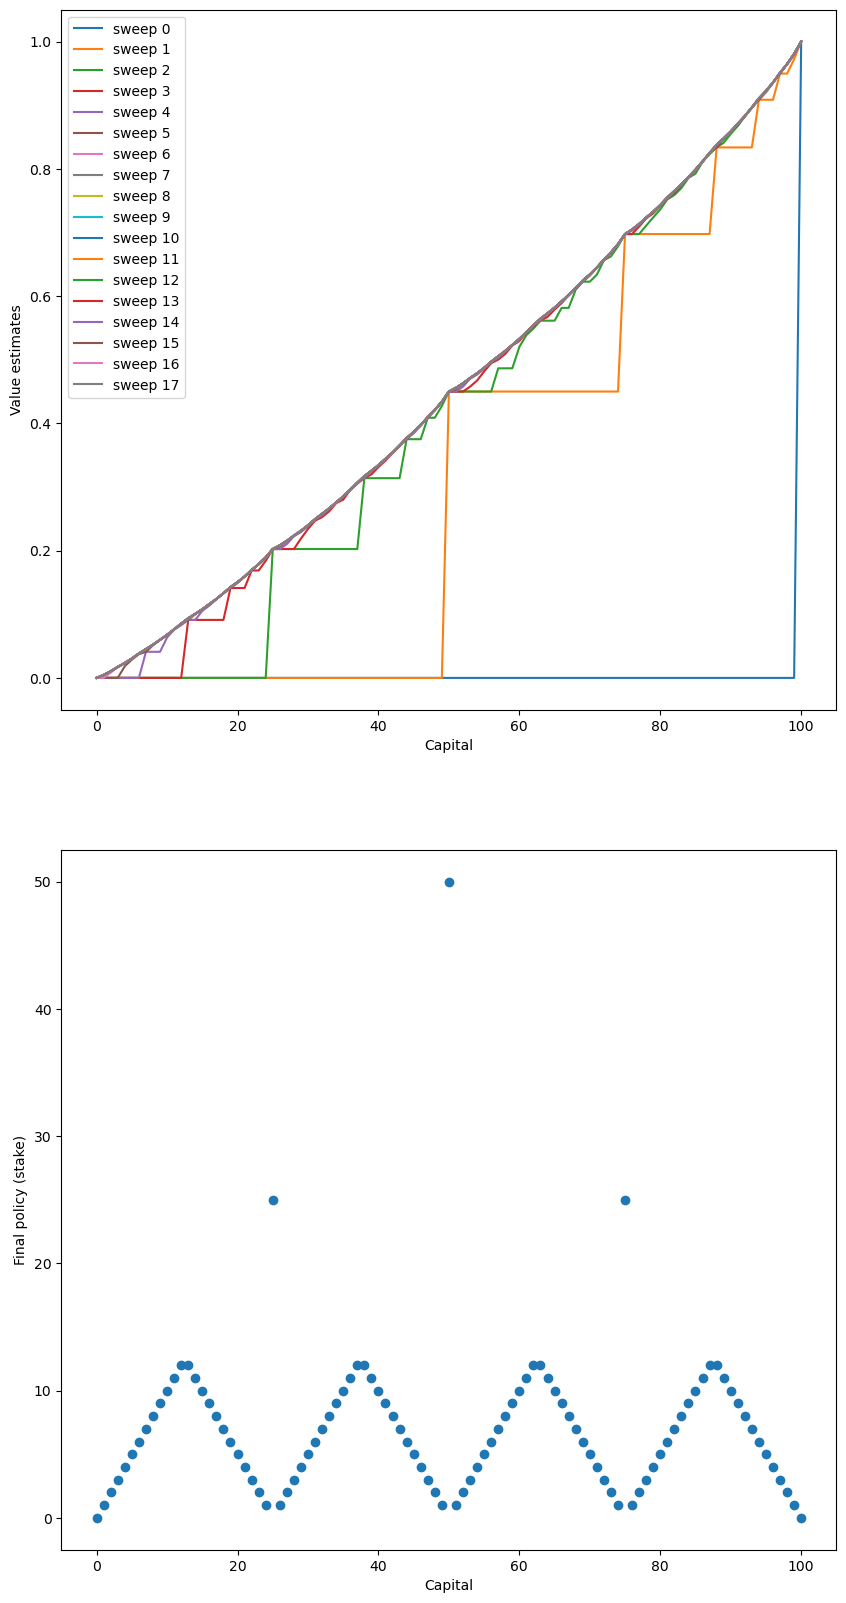

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.45


def figure():
    # state value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    sweeps_history = []

    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(
                    HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break

    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

    
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(sweeps_history):
        plt.plot(state_value, label='sweep {}'.format(sweep))
    print(state_value)
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    print(policy)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()

    plt.savefig('figure_4_3.png')
    plt.close()


if __name__ == '__main__':
    figure()